In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 8
%matplotlib inline

Ноутбук посвящен работе с геоданными с помощью библиотек shapely и geopandas. 

### Знакомство с shapely

`Shapely` - библиотека для работы с геометрическими объектами

`Geopandas` - pandas, только с гео

`folium` - для визуализации

In [2]:
from shapely.geometry import Point, LineString, Polygon

#### точка

In [3]:
moscow_lon = 37.618423
moscow_lat = 55.751244
point = Point(moscow_lon, moscow_lat)

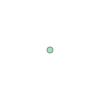

In [4]:
point

In [5]:
print("area ", point.area)
print("length ", point.length)

area  0.0
length  0.0


In [6]:
point.bounds

(37.618423, 55.751244, 37.618423, 55.751244)

In [27]:
point?

Type:        Point
String form: POINT (37.618423 55.751244)
File:        ~/.local/lib/python3.10/site-packages/shapely/geometry/point.py
Docstring:  
A geometry type that represents a single coordinate with
x,y and possibly z values.

A point is a zero-dimensional feature and has zero length and zero area.

Parameters
----------
args : float, or sequence of floats
    The coordinates can either be passed as a single parameter, or as
    individual float values using multiple parameters:

    1) 1 parameter: a sequence or array-like of with 2 or 3 values.
    2) 2 or 3 parameters (float): x, y, and possibly z.

Attributes
----------
x, y, z : float
    Coordinate values

Examples
--------
Constructing the Point using separate parameters for x and y:

>>> p = Point(1.0, -1.0)

Constructing the Point using a list of x, y coordinates:

>>> p = Point([1.0, -1.0])
>>> print(p)
POINT (1 -1)
>>> p.y
-1.0
>>> p.x
1.0

#### Линия

In [7]:
moscow_lon = 37.618423
moscow_lat = 55.751244

piter_lon = 30.26417
piter_lat = 59.89444

line = LineString([(moscow_lon, moscow_lat), (piter_lon, piter_lat)])

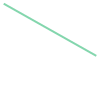

In [8]:
line

bounds - (minx, miny, maxx, maxy) 

In [9]:
line.bounds

(30.26417, 55.751244, 37.618423, 59.89444)

In [10]:
list(line.coords)

[(37.618423, 55.751244), (30.26417, 59.89444)]

#### Полигон

https://boundingbox.klokantech.com/ - сайт для создания bounding box города

In [11]:
polygon = Polygon([(37.3193289,55.489927), 
                   (37.9456611,55.489927),
                   (37.9456611,56.009657),
                   (37.3193289,56.009657)])
print(polygon.area)
print(polygon.length)

0.32552363430599734
2.2921243999999916


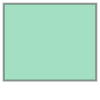

In [12]:
polygon

Границы полигона

In [13]:
polygon.bounds

(37.3193289, 55.489927, 37.9456611, 56.009657)

Для полигона, у которого внутри дырка, можно найти внутренние и внешние границы

In [14]:
list(polygon.exterior.coords)

[(37.3193289, 55.489927),
 (37.9456611, 55.489927),
 (37.9456611, 56.009657),
 (37.3193289, 56.009657),
 (37.3193289, 55.489927)]

In [15]:
list(polygon.interiors)

[]

### Операции с геометрией

<img src=http://docs.qgis.org/testing/en/_images/overlay_operations.png>

intersection

In [16]:
a = Point(0, 0).buffer(1.1)
b = Point(1, 1).buffer(0.7)

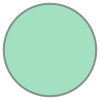

In [17]:
b

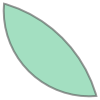

In [18]:
a.intersection(b)

union

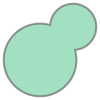

In [19]:
a.union(b)

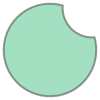

In [20]:
a.difference(b)

contains

In [21]:
polygon.contains(Point(moscow_lon, moscow_lat))

True

In [22]:
polygon.contains(Point(piter_lon, piter_lat))

False

### Geopandas

In [23]:
geo_series = gpd.GeoSeries([Point(-120, 45), Point(-121.2, 46), Point(-122.9, 47.5)])
geo_series

0    POINT (-120.00000 45.00000)
1    POINT (-121.20000 46.00000)
2    POINT (-122.90000 47.50000)
dtype: geometry

In [24]:
geo_series.crs = {'init': 'epsg:4326'}

/home/master/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


#### GeoDataFrame

In [30]:
moscow_districts = gpd.read_file('./data/moscow_districts.geojson')

In [31]:
moscow_districts.columns = moscow_districts.columns.str.lower()

In [32]:
moscow_districts.head()

geometry
0  MULTIPOINT (37.43924 55.62450, 37.73999 55.624...

KeyError: 'totalpopul'

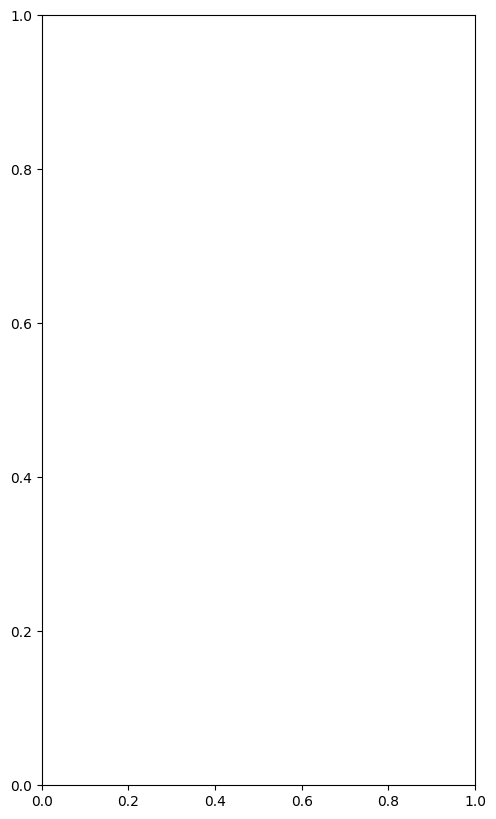

In [33]:
moscow_districts.plot('totalpopul', figsize=(12,10), cmap='OrRd');

#### OpenStreetMap

Скачаем данные по местам из OpenStreetMap на примере Москвы

https://wiki.openstreetmap.org/wiki/Main_Page

`node` - точка, параметры широта и долгота

`way` - линейные объекты, например улица, дорога

`relation` - отношение, для связи между объектами

In [34]:
import requests

https://wiki.openstreetmap.org/wiki/Map_Features - информация по категориям

In [35]:
overpass_url = "https://overpass.kumi.systems/api/interpreter"

overpass_query = """
[out:json];
(
 node["shop"](55.4245,37.0919,56.0671,38.1335);
);
out body;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [36]:
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.59 e21c39fe',
 'osm3s': {'timestamp_osm_base': '2023-03-14T08:30:54Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 1000,
   'lat': 55.9951147,
   'lon': 37.2075319,
   'tags': {'comment': 'ООО "АСП-ГРУПП", ИНН 7735108290, до 22:45 c 2014-05-23',
    'name': 'Десяточка',
    'opening_hours': '08:30-22:45',
    'shop': 'supermarket'}},
  {'type': 'node',
   'id': 245868628,
   'lat': 55.9131682,
   'lon': 37.3961899,
   'tags': {'addr:city': 'Химки',
    'addr:housenumber': 'к4',
    'addr:postcode': '141410',
    'addr:street': 'микрорайон ИКЕА',
    'brand': 'Ашан',
    'brand:en': 'Auchan',
    'brand:ru': 'Ашан',
    'brand:wikidata': 'Q758603',
    'brand:wikipedia': 'ru:Auchan',
    'contact:facebook': 'https://www.facebook.com/AuchanRussia',
    'contact:instagram': 'https://www.instagram.com/auchan.ru/',
    'cont

In [37]:
def get_tag(x, key_name):
    if str(key_name) in x:
        tmp = x[key_name]
        return tmp
    else:
        return "unknown"

In [38]:
loaded = pd.DataFrame(data['elements'])
loaded['shop'] = loaded['tags'].apply(lambda x: get_tag(x, 'shop'))

In [39]:
loaded.head()

type         id        lat        lon  \
0  node       1000  55.995115  37.207532   
1  node  245868628  55.913168  37.396190   
2  node  245942565  55.656054  38.068889   
3  node  249300822  55.634668  37.770433   
4  node  254672440  55.744680  37.864214   

                                                tags         shop  
0  {'comment': 'ООО "АСП-ГРУПП", ИНН 7735108290, ...  supermarket  
1  {'addr:city': 'Химки', 'addr:housenumber': 'к4...  supermarket  
2  {'amenity': 'fuel', 'fuel:diesel': 'yes', 'fue...          yes  
3  {'addr:housenumber': '20 к1', 'addr:street': '...          yes  
4  {'amenity': 'fuel', 'brand': 'Роснефть', 'bran...          yes

#### Создание geodataframe

In [40]:
crs = {'init' :'epsg:4326'}
geometry = [Point(xy) for xy in zip(loaded.lon, loaded.lat)]
places_geo = gpd.GeoDataFrame(loaded, crs=crs, geometry=geometry)

/home/master/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [41]:
places_geo.head()

type         id        lat        lon  \
0  node       1000  55.995115  37.207532   
1  node  245868628  55.913168  37.396190   
2  node  245942565  55.656054  38.068889   
3  node  249300822  55.634668  37.770433   
4  node  254672440  55.744680  37.864214   

                                                tags         shop  \
0  {'comment': 'ООО "АСП-ГРУПП", ИНН 7735108290, ...  supermarket   
1  {'addr:city': 'Химки', 'addr:housenumber': 'к4...  supermarket   
2  {'amenity': 'fuel', 'fuel:diesel': 'yes', 'fue...          yes   
3  {'addr:housenumber': '20 к1', 'addr:street': '...          yes   
4  {'amenity': 'fuel', 'brand': 'Роснефть', 'bran...          yes   

                    geometry  
0  POINT (37.20753 55.99511)  
1  POINT (37.39619 55.91317)  
2  POINT (38.06889 55.65605)  
3  POINT (37.77043 55.63467)  
4  POINT (37.86421 55.74468)

### Spatial join

проверка проекций - у двух датафреймов они должны совпадать

In [42]:
moscow_districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [43]:
places_geo.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [44]:
places_district = gpd.sjoin(moscow_districts, places_geo, how="inner", op='contains')

/home/master/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_3171/2870518855.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  places_district = gpd.sjoin(moscow_districts, places_geo, how="inner", op='contains')


In [45]:
places_district.head()

Empty GeoDataFrame
Columns: [geometry, index_right, type, id, lat, lon, tags, shop]
Index: []

In [46]:
places_district['shop_count'] = places_district.groupby('name')['id'].transform('nunique')

KeyError: 'name'

In [ ]:
district_stats = places_district[['name','geometry', 'shop_count', 'totalpopul']].drop_duplicates('name')#

In [ ]:
district_stats.plot('shop_count', cmap='OrRd', figsize=(12,10), scheme='equals',legend=True);

Изменим проекцию на Pseudo-Mercator EPSG:3857

In [ ]:
district_stats = district_stats.to_crs(epsg=3857)

In [ ]:
district_stats.plot('shop_count', cmap='OrRd', figsize=(12,10), scheme='equals', legend=True);